## Import the libraries

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [11]:
import os

In [12]:
import numpy as np 

In [16]:
data=pd.read_csv('NIFTY50_all.csv')

In [17]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


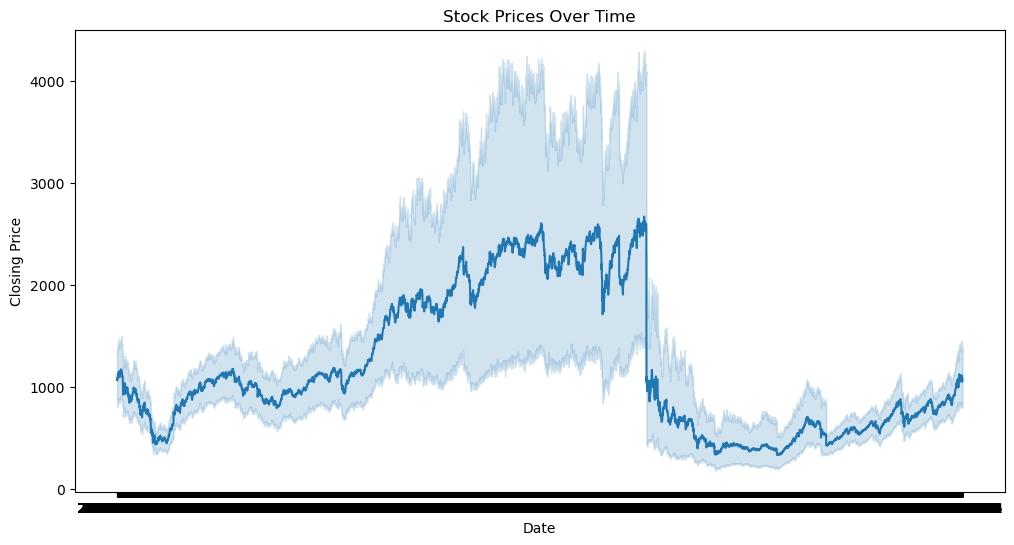

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=data)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'Date' is the column containing dates
# Convert 'Date' to datetime type
data['Date'] = pd.to_datetime(data['Date'])

start_date = '2000-01-01'
end_date = '2021-12-31'

# Filter data based on date range
data_filtered = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Plot Stock Prices Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Close', data=data_filtered)
plt.title('Stock Prices Over Time (2000 to 2021)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()



TypeError: unhashable type: 'numpy.ndarray'

In [24]:
data['Date'] = pd.to_datetime(data['Date'])

In [25]:
data['Daily_Return'] = data['Close'].pct_change()

In [26]:
#Calculate Volatility (Standard Deviation of Daily Returns)
volatility = data['Daily_Return'].std()

In [27]:
print(f"Volatility (Standard Deviation of Daily Returns): {volatility}")

Volatility (Standard Deviation of Daily Returns): 0.055527641622229014


In [30]:
data['Date'] = pd.to_datetime(data['Date'])

In [31]:
data['Daily_Return'] = data['Close'].pct_change()

In [32]:
data['Year'] = data['Date'].dt.year
annual_returns = data.groupby('Year')['Daily_Return'].sum()

In [33]:
# Calculate Annual Volatility (Standard Deviation of Annual Returns)
annual_volatility = data.groupby('Year')['Daily_Return'].std()

## Annual Volatality for the Index (Standard Deviation)

In [34]:
print(f"Annual Volatility (Standard Deviation of Annual Returns): {annual_volatility}")

Annual Volatility (Standard Deviation of Annual Returns): Year
2000    0.268680
2001    0.036295
2002    0.029118
2003    0.027719
2004    0.035226
2005    0.029069
2006    0.030062
2007    0.025502
2008    0.040367
2009    0.033237
2010    0.027376
2011    0.025285
2012    0.018294
2013    0.022781
2014    0.023216
2015    0.021931
2016    0.023168
2017    0.019979
2018    0.020500
2019    0.021377
2020    0.030851
2021    0.022845
Name: Daily_Return, dtype: float64


In [35]:
threshold_volatility = 0.01026656 #40 percent of the std mean

In [36]:
data['Market_Crash'] = (annual_volatility > threshold_volatility).astype(int)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
import os
import numpy as np 

In [6]:
data=pd.read_csv('NIFTY50_all.csv')

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data['Daily_Return'] = data['Close'].pct_change()

In [11]:
data['Year'] = data['Date'].dt.year
annual_returns = data.groupby('Year')['Daily_Return'].sum()

In [14]:
# Calculate Annual Volatility (Standard Deviation of Annual Returns)
annual_volatility = data.groupby('Year')['Daily_Return'].std()

In [16]:
threshold_volatility = 0.01026656 # 40% of mean of annual volatality

In [70]:
for year in data['Year'].unique():
    condition = annual_volatility[annual_volatility.index == year].iloc[0] > threshold_volatility
    data.loc[data['Year'] == year, 'Market_Crash'] = 1 if condition else 0

# Display the DataFrame with the new target variable
print(data[['Year', 'Market_Crash']])

KeyError: 'Year'

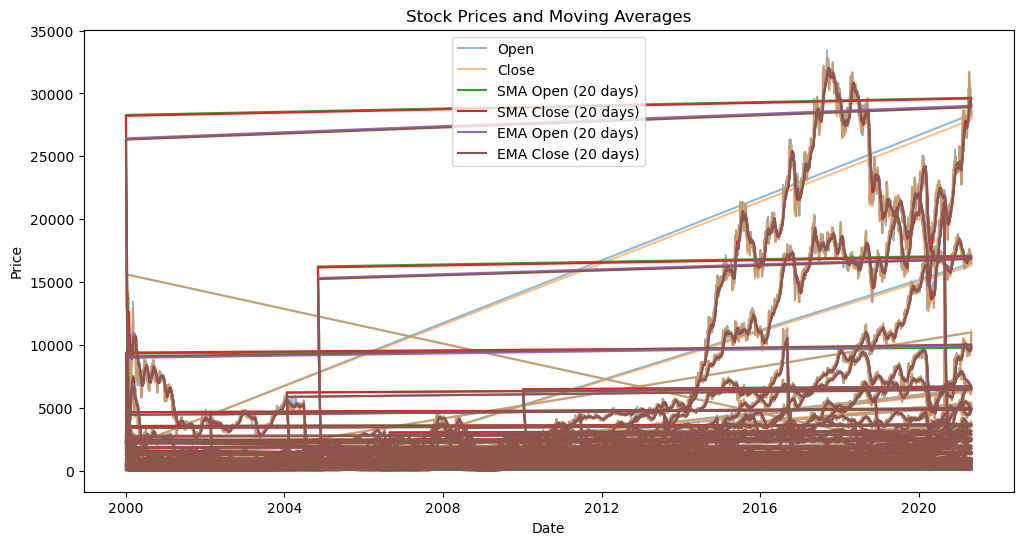

In [24]:
window_sma = 20  #  SMA gives more weight to long term prices
data['SMA_Open'] = data['Open'].rolling(window=window_sma).mean()
data['SMA_Close'] = data['Close'].rolling(window=window_sma).mean()

# Calculate Exponential Moving Averages (EMA) EMA gives more weight to recent prices
window_ema = 20  # Adjust the window size as needed
data['EMA_Open'] = data['Open'].ewm(span=window_ema, adjust=False).mean()
data['EMA_Close'] = data['Close'].ewm(span=window_ema, adjust=False).mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plotting Open and Close Prices
plt.plot(data['Date'], data['Open'], label='Open', alpha=0.5)
plt.plot(data['Date'], data['Close'], label='Close', alpha=0.5)

# Plotting Moving Averages
plt.plot(data['Date'], data['SMA_Open'], label=f'SMA Open ({window_sma} days)')
plt.plot(data['Date'], data['SMA_Close'], label=f'SMA Close ({window_sma} days)')
plt.plot(data['Date'], data['EMA_Open'], label=f'EMA Open ({window_ema} days)')
plt.plot(data['Date'], data['EMA_Close'], label=f'EMA Close ({window_ema} days)')

plt.title('Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [26]:
def calculate_rolling_averages(df, window):
    df['SMA'] = df['Close'].rolling(window=window).mean()
    df['EMA'] = df['Close'].ewm(span=window, adjust=False).mean()
    return df

# to calculate averages annually
window_size = 20  

# rolling averages calculation
annual_averages = (
    data.groupby(data['Date'].dt.year)
    .apply(calculate_rolling_averages, window=window_size)
    .reset_index(drop=True)
)


for year, group in annual_averages.groupby(annual_averages['Date'].dt.year):
    print(f"\nYear: {year}")
    print(group[['Date', 'Close', 'SMA', 'EMA']])


Year: 2000
           Date   Close       SMA         EMA
0    2000-01-03  381.65       NaN  381.650000
1    2000-01-04  385.55       NaN  382.021429
2    2000-01-05  383.00       NaN  382.114626
3    2000-01-06  377.50       NaN  381.675138
4    2000-01-07  385.70       NaN  382.058458
...         ...     ...       ...         ...
7699 2000-12-22  261.70  299.3200  297.510152
7700 2000-12-26  258.55  297.8475  293.799661
7701 2000-12-27  269.05  296.8875  291.442551
7702 2000-12-28  277.85  296.4500  290.148022
7703 2000-12-29  277.80  296.2450  288.972020

[7704 rows x 4 columns]

Year: 2001
            Date   Close       SMA         EMA
7704  2001-01-01  272.20       NaN  272.200000
7705  2001-01-02  273.70       NaN  272.342857
7706  2001-01-03  275.05       NaN  272.600680
7707  2001-01-04  275.15       NaN  272.843473
7708  2001-01-05  268.85       NaN  272.463142
...          ...     ...       ...         ...
15563 2001-12-24  105.30  129.4450  121.218000
15564 2001-12-26  101.1

In [28]:
#average SMA and EMA for all the years
average_averages = annual_averages.groupby(annual_averages['Date'].dt.year).agg({
    'SMA': 'mean',
    'EMA': 'mean'
}).reset_index()

print(average_averages)

    Date          SMA          EMA
0   2000   803.978798   802.965017
1   2001   473.207110   472.718162
2   2002   409.957743   409.649190
3   2003   447.346595   447.097691
4   2004   553.219682   552.799527
5   2005   597.415383   596.913242
6   2006   742.860665   742.577100
7   2007   905.851433   905.992417
8   2008   788.147529   788.879370
9   2009   746.167616   745.505687
10  2010  1077.594302  1076.816252
11  2011   937.081999   935.837911
12  2012   974.547121   973.233308
13  2013  1104.352420  1102.854477
14  2014  1444.677303  1442.625156
15  2015  1816.533976  1814.200238
16  2016  1964.289177  1961.602098
17  2017  2242.467621  2239.402238
18  2018  2369.789990  2366.699267
19  2019  2288.215277  2285.203153
20  2020  2235.823024  2232.973035
21  2021  2556.039760  2546.113091


In [31]:
data = {
    'Date': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'SMA': [803.978798, 473.207110, 409.957743, 447.346595, 553.219682, 597.415383, 742.860665, 905.851433, 788.147529, 746.167616, 1077.594302, 937.081999, 974.547121, 1104.352420, 1444.677303, 1816.533976, 1964.289177, 2242.467621, 2369.789990, 2288.215277, 2235.823024, 2556.039760],
    'EMA': [802.965017, 472.718162, 409.649190, 447.097691, 552.799527, 596.913242, 742.577100, 905.992417, 788.879370, 745.505687, 1076.816252, 935.837911, 973.233308, 1102.854477, 1442.625156, 1814.200238, 1961.602098, 2239.402238, 2366.699267, 2285.203153, 2232.973035, 2546.113091],
}

df = pd.DataFrame(data)

# Function to detect sudden drops and assign 1 to the corresponding years
def detect_sudden_drop(data, threshold=0.1):
    result = []
    for i in range(1, len(data)):
        drop_sma = (data['SMA'][i - 1] - data['SMA'][i]) / data['SMA'][i - 1]
        drop_ema = (data['EMA'][i - 1] - data['EMA'][i]) / data['EMA'][i - 1]

        if drop_sma > threshold or drop_ema > threshold:
            result.append(1)
        else:
            result.append(0)
    
    # Append a value for the last year
    result.append(0)
    
    return result

# Detect sudden drops using the function
df['SuddenDrop'] = detect_sudden_drop(df)

# Display the result
print(df[['Date', 'SuddenDrop']])

    Date  SuddenDrop
0   2000           1
1   2001           1
2   2002           0
3   2003           0
4   2004           0
5   2005           0
6   2006           0
7   2007           1
8   2008           0
9   2009           0
10  2010           1
11  2011           0
12  2012           0
13  2013           0
14  2014           0
15  2015           0
16  2016           0
17  2017           0
18  2018           0
19  2019           0
20  2020           0
21  2021           0


In [40]:
data = {
    'Date': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'VWAP': [803.978798, 473.207110, 409.957743, 447.346595, 553.219682, 597.415383, 742.860665, 905.851433, 788.147529, 746.167616, 1077.594302, 937.081999, 974.547121, 1104.352420, 1444.677303, 1816.533976, 1964.289177, 2242.467621, 2369.789990, 2288.215277, 2235.823024, 2556.039760],
}

df = pd.DataFrame(data)

# Group by 'Date' and calculate the mean for each group
annual_mean_vwap = df.groupby('Date')['VWAP'].mean().reset_index()

# Display the result
print(annual_mean_vwap)


    Date         VWAP
0   2000   803.978798
1   2001   473.207110
2   2002   409.957743
3   2003   447.346595
4   2004   553.219682
5   2005   597.415383
6   2006   742.860665
7   2007   905.851433
8   2008   788.147529
9   2009   746.167616
10  2010  1077.594302
11  2011   937.081999
12  2012   974.547121
13  2013  1104.352420
14  2014  1444.677303
15  2015  1816.533976
16  2016  1964.289177
17  2017  2242.467621
18  2018  2369.789990
19  2019  2288.215277
20  2020  2235.823024
21  2021  2556.039760


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import numpy as np

In [43]:
data=pd.read_csv('NIFTY50_all.csv')

In [44]:
data['Returns'] = (data['Close'] - data['Open']) / data['Open']

In [46]:
window_size = 20 
data['RollingAvg'] = data['Returns'].rolling(window=window_size).mean()

In [47]:
data['InvertedCurve'] = data['Returns'] > data['RollingAvg']

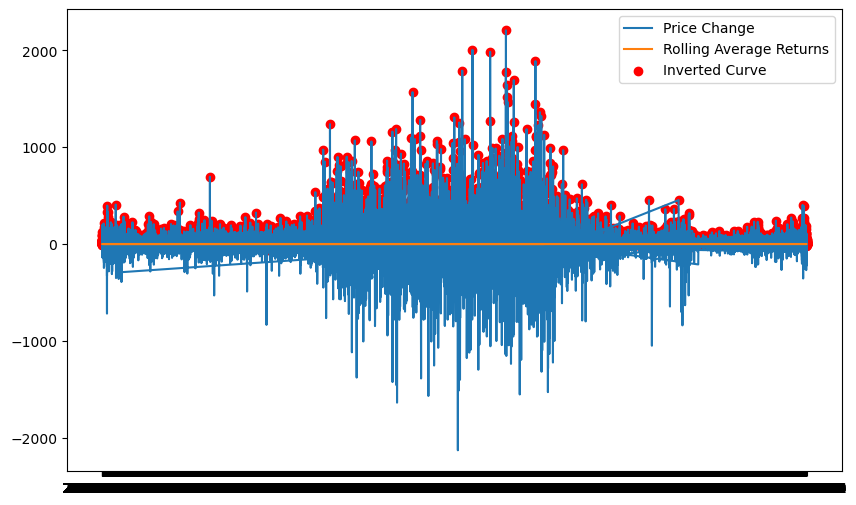

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'] - data['Open'], label='Price Change')
plt.plot(data['Date'], data['RollingAvg'], label='Rolling Average Returns')

# data for inverted curve points
inverted_curve_points = data[data['InvertedCurve']]
plt.scatter(inverted_curve_points['Date'], inverted_curve_points['Close'] - inverted_curve_points['Open'], color='red', label='Inverted Curve')

plt.legend()
plt.show()


In [53]:
data['Date'] = pd.to_datetime(data['Date'])
for year, group in inverted_curve_points.groupby(data['Date'].dt.year):
    print(f'Year {year}:')
    print(group[['Date', 'Open', 'Close', 'RollingAvg']])

Year 2000:
              Date   Open   Close  RollingAvg
3322    2000-01-03  370.0  381.65    0.003647
3323    2000-01-04  380.0  385.55    0.002783
3324    2000-01-05  371.5  383.00    0.003614
3326    2000-01-07  376.0  385.70    0.001146
3333    2000-01-18  410.0  414.05    0.003198
...            ...    ...     ...         ...
230127  2000-12-18  295.0  301.60    0.001392
230129  2000-12-20  291.0  300.30    0.002268
230133  2000-12-27  260.0  269.05   -0.005869
230134  2000-12-28  274.5  277.85   -0.005539
230135  2000-12-29  277.2  277.80   -0.004714

[3761 rows x 4 columns]
Year 2001:
              Date    Open   Close  RollingAvg
3573    2001-01-02  270.05  273.70    0.007086
3574    2001-01-03  273.05  275.05    0.007006
3580    2001-01-11  261.35  269.00   -0.003490
3582    2001-01-15  249.00  265.15    0.001878
3583    2001-01-16  262.40  263.75   -0.002384
...            ...     ...     ...         ...
230371  2001-12-11  137.00  145.90    0.008020
230379  2001-12-24   98.0

In [60]:

data['Date'] = pd.to_datetime(data['Date'])

# Calculate the daily price change
data['PriceChange'] = data['Close'] - data['Open']


data['AdvanceDecline'] = 0

# Calculate Advance-Decline Line
for i in range(1, len(data)):
    adv_decline = (data['PriceChange'].iloc[i] > 0) ^ (data['PriceChange'].iloc[i] < 0)
    data.at[i, 'AdvanceDecline'] = data['AdvanceDecline'].iloc[i - 1] + adv_decline


print(data[['Date', 'AdvanceDecline']])


             Date  AdvanceDecline
0      2007-11-27               0
1      2007-11-28               1
2      2007-11-29               2
3      2007-11-30               3
4      2007-12-03               4
...           ...             ...
235187 2021-04-26          234140
235188 2021-04-27          234141
235189 2021-04-28          234142
235190 2021-04-29          234143
235191 2021-04-30          234144

[235192 rows x 2 columns]
